In [6]:
import pandas as pd

# Load the CSV file (replace with your file path)
df = pd.read_csv(r'C:\Users\RAM\Documents\final project\new_file.csv')

In [10]:
# Convert the 'admission_date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Verify the conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1077 non-null   datetime64[ns]
 1   patient_id            1077 non-null   object        
 2   patient_gender        1077 non-null   object        
 3   patient_age           1077 non-null   int64         
 4   patient_sat_score     1077 non-null   float64       
 5   patient_first_inital  1077 non-null   object        
 6   patient_last_name     1077 non-null   object        
 7   patient_race          1077 non-null   object        
 8   patient_admin_flag    1077 non-null   bool          
 9   patient_waittime      1077 non-null   int64         
 10  department_referral   1077 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.3+ KB
None


In [14]:
daily_data = df.groupby(df['date'].dt.date).size()
print(daily_data.head())

date
2019-04-01    2
2019-04-02    2
2019-04-03    2
2019-04-05    3
2019-04-06    2
dtype: int64


In [16]:
weekly_data = df.groupby(df['date'].dt.to_period('W')).size()
print(weekly_data.head())


date
2019-04-01/2019-04-07    11
2019-04-08/2019-04-14    19
2019-04-15/2019-04-21    13
2019-04-22/2019-04-28    13
2019-04-29/2019-05-05    13
Freq: W-SUN, dtype: int64


In [18]:
monthly_data = df.groupby(df['date'].dt.to_period('M')).size()
print(monthly_data.head())


date
2019-04    60
2019-05    53
2019-06    57
2019-07    47
2019-08    52
Freq: M, dtype: int64


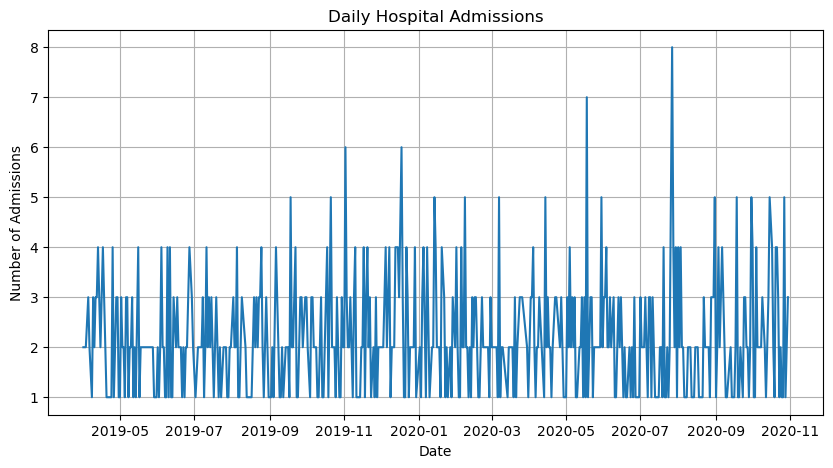

In [24]:
import matplotlib.pyplot as plt

# Plot daily admissions
plt.figure(figsize=(10, 5))
daily_data.plot(kind='line', title='Daily Hospital Admissions', xlabel='Date', ylabel='Number of Admissions')
plt.grid(True)
plt.show()

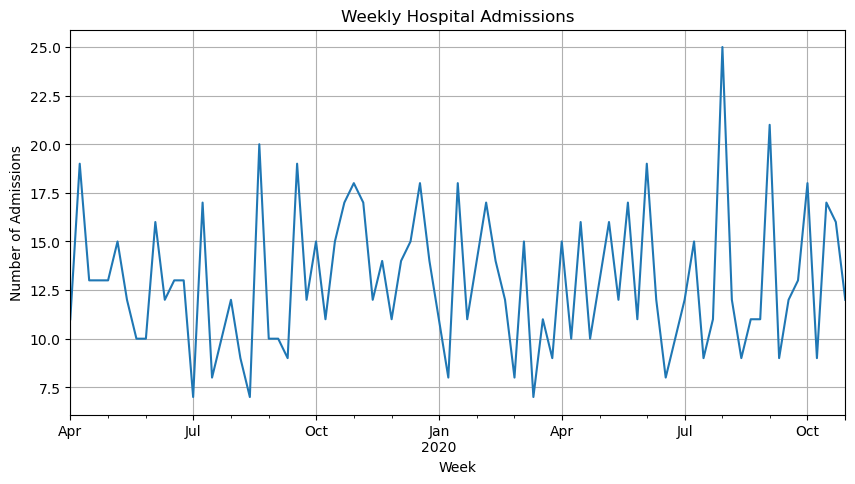

In [26]:
# Plot weekly admissions
plt.figure(figsize=(10, 5))
weekly_data.plot(kind='line', title='Weekly Hospital Admissions', xlabel='Week', ylabel='Number of Admissions')
plt.grid(True)
plt.show()

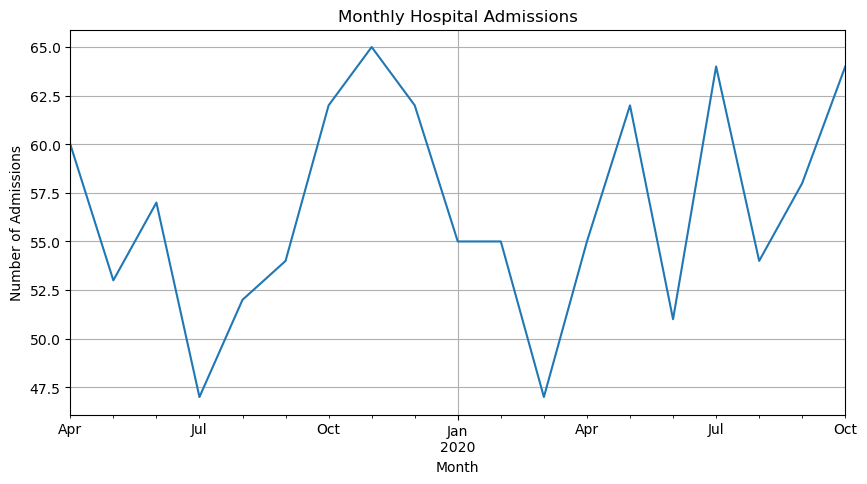

In [50]:
# Plot monthly admissions
plt.figure(figsize=(10, 5))
monthly_data.plot(kind='line', title='Monthly Hospital Admissions', xlabel='Month', ylabel='Number of Admissions')
plt.grid(True)
plt.show()

In [38]:
# Identify days with the highest admissions
peak_days = daily_data.nlargest(5)
print("Top 5 peak days:\n", peak_days)

Top 5 peak days:
 date
2020-07-27    8
2020-05-18    7
2019-11-02    6
2019-12-18    6
2019-09-18    5
dtype: int64


In [40]:
# Identify months with the highest admissions
peak_months = monthly_data.nlargest(5)
print("Top 5 peak months:\n", peak_months)

Top 5 peak months:
 date
2019-11    65
2020-07    64
2020-10    64
2019-10    62
2019-12    62
Freq: M, dtype: int64


In [44]:
# Extract month and analyze admissions per month across years
df['month'] = df['date'].dt.month
monthly_trends = df.groupby('month').size()
print(monthly_trends)


month
1      55
2      55
3      47
4     115
5     115
6     108
7     111
8     106
9     112
10    126
11     65
12     62
dtype: int64


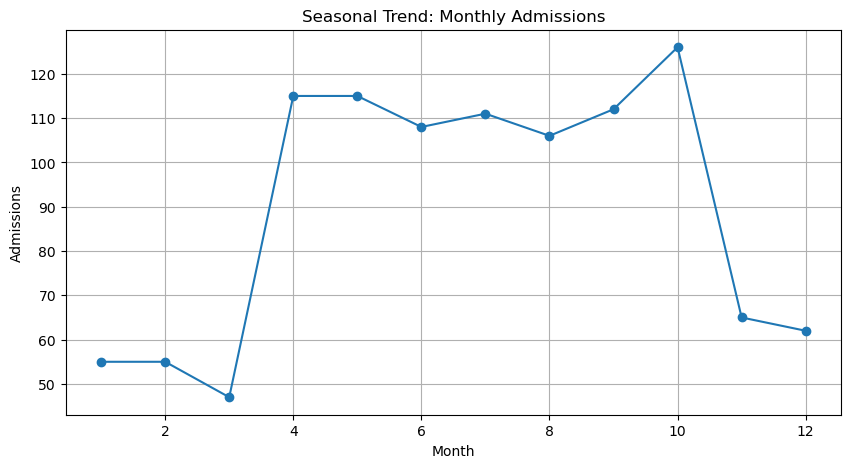

In [46]:
# Plot seasonal trend (admissions by month)
plt.figure(figsize=(10, 5))
monthly_trends.plot(kind='line', marker='o', title='Seasonal Trend: Monthly Admissions', xlabel='Month', ylabel='Admissions')
plt.grid(True)
plt.show()